# Evaluation of trained network for temporal super-resolution

In [1]:
#%matplotlib notebook
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.animation as animation
from IPython.display import display
import pandas as pd
from collections import defaultdict
plt.rcParams['figure.figsize'] = [10, 8]

import sys
sys.path.insert(0, '../../src')

from utils.evaluate_utils import *


%matplotlib inline

In [2]:
#display models
df = pd.read_csv('../../results/Overview_models.csv')
df1 = df[['Name', 'notes']]
pd.set_option("max_colwidth", None)
display(df1)

,Name,notes
0,Temporal4DFlowNet_20230210-0333,NaN
1,Temporal4DFlowNet_20230215-1029,NaN
2,Temporal4DFlowNet_20230217-0602,NaN
3,Temporal4DFlowNet_20230220-0908,NaN
4,Temporal4DFlowNet_20230301-1127,First training on radial sampled data
...,...,...
73,Temporal4DFlowNet_20240110-1804,"Run on smoothed data set, bot LR with LRfct smoothed and HR with HR fct smoothed"
74,Temporal4DFlowNet_20240115-1535,"Updated: Run on smoothed data set, bot LR with LRfct smoothed and HR with HR fct smoothed. Containing the bug free files without compression"
75,Temporal4DFlowNet_20240118-1300,"Updated: Run on smoothed data set, bot LR with LRfct smoothed and HR with HR fct smoothed. Containing the bug free files without compression"
76,Temporal4DFlowNet_20240119-1420,Swap training and validation file (see if train still abvoe test in loss)


In [3]:
# 20230407-2246
# model_names  = ['20230301-1641', '20230301-1654', '20230301-1704', '20230305-1001', '20230305-1002', '20230305-1008', '20230305-1107'     , '20230306-1120']
# tabular_names = ['ResNet_8_4'   , 'DenseNet_8_4' , 'CSPNet_8_4'   , 'ResNet_4_2'   ,'ResNet_6_6'    , 'ResNet_4_8'   , 'ResNet_Conv3DT_8_4', 'ResNet_NN_8_4']
# ['20230405-1417']
# model_names = ['20230405-1417', '20230620-0909',   ]#'20230619-1655', '20230619-1711']
# tabular_names = ['Baseline', 'BaselineMoreEpochs', ]#'BaselineLRDecay', 'BaselineNoL2Reg']
#'20230405-1417'
# model_names = ['20230620-0909', '20230405-1419', '20230405-1421','20230407-2222']  #['20230405-1417', '20230313-0948', '20230313-0949','20230404-1418', '20230405-1419','20230405-1421', '20230405-1422' ,'20230405-1423', '20230406-1601'  ]#['20230308-1226', '20230313-0948', '20230313-0949','20230313-0951','20230315-1509' ]#'*', '20230313-0951']#['20230301-1641', '20230301-1654', '20230301-1704', '20230305-1001', '20230305-1002', '20230305-1008', '20230305-1107'     , '20230306-1120']
# tabular_names = ['ResNet 8-4' , 'ResNet 4-8', 'ResNet 10-6', 'ResNet 4-2']

# model_names = ['20230508-1433', '20230602-1701' ]
# tabular_names = ['OriginalModel', 'OriginalModelMoreEpochs']
# model_names = ['20230405-1417', '20230620-0909', '20230619-1655', '20230619-1711' ]  # #['20230405-1417', '20230313-0948', '20230313-0949','20230404-1418', '20230405-1419','20230405-1421', '20230405-1422' ,'20230405-1423', '20230406-1601'  ]#['20230308-1226', '20230313-0948', '20230313-0949','20230313-0951','20230315-1509' ]#'*', '20230313-0951']#['20230301-1641', '20230301-1654', '20230301-1704', '20230305-1001', '20230305-1002', '20230305-1008', '20230305-1107'     , '20230306-1120']
# tabular_names = ['ResNetOriginal', 'ResNet longer epochs', 'weight decay', 'Resnet no l2 regularization']# 
# model_names = ['20230405-1417', '20230405-1419', '20230405-1421','20230407-2222', '20230405-1423', '20230405-1422',  '20230404-1418', '20230407-2228', '20230407-2230', '20230407-2246']#['20230405-1417', '20230313-0948', '20230313-0949','20230404-1418', '20230405-1419','20230405-1421', '20230405-1422' ,'20230405-1423', '20230406-1601'  ]#['20230308-1226', '20230313-0948', '20230313-0949','20230313-0951','20230315-1509' ]#'*', '20230313-0951']#['20230301-1641', '20230301-1654', '20230301-1704', '20230305-1001', '20230305-1002', '20230305-1008', '20230305-1107'     , '20230306-1120']
# tabular_names = ['ResNet-8-4' , 'ResNet_4-8', 'ResNet_10-6', 'ResNet_4-2','ResNet_TranspConv3D', 'ResNet_NN', 'ResNet_Unet',  'DenseNet', 'CSPNet', 'ResNet_ResNet_Unet']#['ResNet_8_4',  'DenseNet_8_4', 'CSPNet_8-4', 'ResNet_Unet','ResNet_4_8','ResNet_10_6', 'ResNet_NN', 'ResNet_Conv3DT', 'ResNet_Post_Unet' ]#['Dyn_ResNet', 'Dyn_DenseNet', 'Dyn_SCPNet', 'Dyn_ResNet_Conv3DT', 'Dyn_ResNet_4_8']    #, 'Dyn_CSPNet']#['ResNet_8_4'   , 'DenseNet_8_4' , 'CSPNet_8_4'   , 'ResNet_4_2'   ,'ResNet_6_6'    , 'ResNet_4_8'   , 'ResNet_Conv3DT_8_4', 'ResNet_NN_8_4']
# model_names  =  ['20230405-1417','20230425-1654', '20230425-1715', '20230425-1719']#['20230405-1417', '20230427-1204', '20230427-1207']#['20230405-1417','20230425-1654', '20230425-1715', '20230425-1719'	 ]#['20230405-1417', '20230405-1419', '20230405-1421','20230407-2222', '20230405-1423', '20230405-1422',  '20230404-1418', '20230407-2228', '20230407-2230', '20230407-2246']#['20230405-1417', '20230313-0948', '20230313-0949','20230404-1418', '20230405-1419','20230405-1421', '20230405-1422' ,'20230405-1423', '20230406-1601'  ]#['20230308-1226', '20230313-0948', '20230313-0949','20230313-0951','20230315-1509' ]#'*', '20230313-0951']#['20230301-1641', '20230301-1654', '20230301-1704', '20230305-1001', '20230305-1002', '20230305-1008', '20230305-1107'     , '20230306-1120']
# tabular_names = ['ResNet_ResNet', 'LSTM_ResNet', 'LSTM_LSTM', 'ResNet_LSTM']#['TrainM2M3-ValM1', 'TrainM1M3-ValM2', 'TrainM1M2-ValM3' ] #['ResNet_ResNet', 'LSTM_ResNet', 'LSTM_LSTM', 'ResNet_LSTM'] #['ResNet-8-4' , 'ResNet_4-8', 'ResNet_10-6', 'ResNet_4-2','ResNet_TranspConv3D', 'ResNet_NN', 'ResNet_Unet',  'DenseNet', 'CSPNet', 'ResNet_ResNet_Unet']#['ResNet_8_4',  'DenseNet_8_4', 'CSPNet_8-4', 'ResNet_Unet','ResNet_4_8','ResNet_10_6', 'ResNet_NN', 'ResNet_Conv3DT', 'ResNet_Post_Unet' ]#['Dyn_ResNet', 'Dyn_DenseNet', 'Dyn_SCPNet', 'Dyn_ResNet_Conv3DT', 'Dyn_ResNet_4_8']    #, 'Dyn_CSPNet']#['ResNet_8_4'   , 'DenseNet_8_4' , 'CSPNet_8_4'   , 'ResNet_4_2'   ,'ResNet_6_6'    , 'ResNet_4_8'   , 'ResNet_Conv3DT_8_4', 'ResNet_NN_8_4']


model_names = ['20240207-1150', '20240124-1757', '20240212-1107', '20240212-1109', '20240212-1555', '20240212-1612', '20240206-1809']
tabular_names = [f'MSE loss', 'MAE loss'       , 'comb. mutal. proj.(w=0.5,a=0.5)', 'comb. mutal. proj.(w=0,a=0.5)', 'mut. proj(0.2) with mse (0.8)', 'cosine sim.(0.2) with mse (0.8)', 'huber loss (delta=0.05)' ]
 

set_name = 'Validation'               
data_model= '1'
step = 2
use_dyn_mask = True
eval_dir = '../../results/plots/ComparisonPlots_lossfct_TBD/'


### Define helper functions


In [4]:
vel_colnames=['u', 'v', 'w']
vel_colnames_fluid = ['u_fluid', 'v_fluid', 'w_fluid']

load_interpolation = False

#directories
gt_dir = '../../data/CARDIAC'
result_dir = f'../../results/'
eval_dir = f'{result_dir}/plots'
lr_dir = '../../data/CARDIAC'

if not os.path.isdir(eval_dir): os.makedirs(eval_dir)


inbetween_string = ''
if use_dyn_mask:
    inbetween_string = '_dynamic'

#filenames
lr_filename = f'M{data_model}_2mm_step{step}_invivoP01_magn_temporalsmoothing_toeger_periodic_LRfct_noise.h5'
gt_filename = f'M{data_model}_2mm_step{step}_invivoP01_magn_temporalsmoothing_toeger_periodic_HRfct.h5'
# gt_filename = f'M{data_model}_2mm_step{step}_static{inbetween_string}.h5' #f'M{data_model}_2mm_step{step}_invivoP02_magnitude.h5'#f'M{data_model}_2mm_step{step}_static{inbetween_string}.h5'
# lr_filename = f'M{data_model}_2mm_step{step}_static{inbetween_string}_noise.h5'#f'M{data_model}_2mm_step{step}_invivoP02_magnitude_noisy.h5'#f'M{data_model}_2mm_step{step}_static{inbetween_string}_noise.h5'
# result_filename = f'{set_name}set_result_model{data_model}_2mm_step{step}_{model_name[-4::]}_temporal{ending_file}.h5' #_newpadding

# Setting up
gt_filepath = '{}/{}'.format(gt_dir, gt_filename)
lr_filepath = '{}/{}'.format(lr_dir, lr_filename)

# load data HR and LR
gt = load_velocity_data(gt_filepath, {}, vel_colnames, load_mask = True)
lr = load_velocity_data(lr_filepath, {}, vel_colnames, load_mask = False)

# if lr not downsampled yet (only noise added)
if lr['u'].shape[0] == gt['u'].shape[0]:
    offset = 0
    for vel in vel_colnames:
        lr[vel] = lr[vel][offset::2, :, :, :]


# add information considering only the fluid regions
for vel in vel_colnames:
    lr[f'{vel}_fluid'] = np.multiply(lr[vel], gt['mask'][offset::2])
    gt[f'{vel}_fluid'] = np.multiply(gt[vel], gt['mask'])

# include speed calculations
gt['speed'] = np.sqrt(gt["u"]**2 + gt["v"]**2 + gt["w"]**2)
lr['speed'] = np.sqrt(lr["u"]**2 + lr["v"]**2 + lr["w"]**2)


if load_interpolation: 
    #TODO: revise interpolation methods

    interpolate_NN = load_vel_interpolation({},lr, f'{result_dir}/interpolation/{lr_filename}_interpolate_NN.h5', 'nearest', gt['mask'], vel_colnames, savefile = False)
    interpolate_linear = load_vel_interpolation({},lr, f'{result_dir}/interpolation/{lr_filename}_interpolate_linear.h5', 'linear', gt['mask'], vel_colnames, savefile = False)
    interpolate_cubic = load_vel_interpolation({},lr, f'{result_dir}/interpolation/{lr_filename}_interpolate_cubic.h5', 'cubic', gt['mask'], vel_colnames, savefile = False)
    interpolate_sinc = load_vel_interpolation({},lr, f'{result_dir}/interpolation/{lr_filename}_interpolate_sinc.h5', 'sinc', gt['mask'], vel_colnames, savefile = False)
    

def get_evaluation_metrics(results, prediction, ground_truth,temporal_mask, t_peak_flow):
    '''
    Append error variables RMSE (avg and std), k, r'2,  into dict 
    '''
    directions = ['x', 'y', 'z']
    vel_colnames = ['u', 'v', 'w']
    for direction, vel in zip(directions, vel_colnames):
        RMSEi, std = calculate_rmse(prediction[f'{vel}_fluid'][t_peak_flow], ground_truth[f'{vel}_fluid'][t_peak_flow], temporal_mask[t_peak_flow], return_std = True)
        results[f'RMSE{direction}'].append(RMSEi[0])
        results[f'RMSE{direction}_std'].append(std[0])
        k, R2 = calculate_k_R2(prediction[vel][t_peak_flow], ground_truth[vel][t_peak_flow], temporal_mask[t_peak_flow])
        results[f'k{direction}'].append(k)
        results[f'R_2{direction}'].append(R2)
    
    results['RE'].append(calculate_relative_error_normalized(prediction["u"], prediction["v"], prediction["w"], ground_truth["u"], ground_truth["v"] , ground_truth["w"], ground_truth["mask"])[t_peak_flow])

    return results

M1_2mm_step2_invivoP01_magn_temporalsmoothing_toeger_periodic_HRfct.h5 M1_2mm_step2_invivoP01_magn_temporalsmoothing_toeger_periodic_LRfct_noise.h5


### Tabulate plots

In [34]:

dict_results = defaultdict(list)


N_frames = gt['u'].shape[0]
peak_flow_frame = np.unravel_index(np.argmax(gt['speed']), shape = gt['speed'].shape)[0]
print("Peak flow frame:", peak_flow_frame)
if peak_flow_frame%2 == 0: 
    peak_flow_frame +=1
    print("Peak flow frame changed to:", peak_flow_frame)


if True:
    ending_file = ''
    for m_name, t_name in zip(model_names, tabular_names):
        result_filename = f'Temporal4DFlowNet_{m_name}/{set_name}set_result_model{data_model}_2mm_step{step}_{m_name[-4::]}_temporal{ending_file}.h5' #_newpadding

        pred = load_velocity_data(f'{result_dir}{result_filename}', {}, ['u_combined', 'v_combined', 'w_combined'], load_mask = False)
        for vel in vel_colnames:
            pred[f'{vel}_fluid'] = np.multiply(pred[vel], gt['mask'])
        dict_results['Network'].append(t_name)
        dict_results = get_evaluation_metrics(dict_results,pred,gt, gt['mask'],peak_flow_frame) #evaluate

gt['mean_speed'] = calculate_mean_speed(gt["u_fluid"], gt["v_fluid"] , gt["w_fluid"], gt["mask"])

# load interpolation files and evaulate those with given data
if load_interpolation: 
    interpolate_linear, interpolate_cubic, interpolate_NN = load_interpolation(data_model, step,lr, gt, use_dynamical_mask = use_dyn_mask)

    dict_results['Network'].append('Linear interpolation')
    dict_results = get_evaluation_metrics(dict_results,interpolate_linear,gt,gt['mask'], peak_flow_frame)

    dict_results['Network'].append('Cubic interpolation')
    dict_results = get_evaluation_metrics(dict_results,interpolate_cubic,gt,gt['mask'], peak_flow_frame)

    rel_error_lin_interpolation =   calculate_relative_error_normalized(interpolate_linear["u"], interpolate_linear["v"], interpolate_linear["w"], gt["u"], gt["v"] , gt["w"], gt["mask"])
    rel_error_cubic_interpolation = calculate_relative_error_normalized(interpolate_cubic["u"], interpolate_cubic["v"], interpolate_cubic["w"], gt["u"], gt["v"] , gt["w"], gt["mask"])


r_dt = pd.DataFrame(dict_results).round(4)
display(r_dt)

Create temporal mask for RMSE caculation (71, 69, 75) (1, 71, 69, 75) (1, 71, 69, 75)
Create static temporal mask.
Reshaped to (1, 71, 69, 75)
Create temporal mask for RMSE caculation (71, 69, 75) (1, 71, 69, 75) (1, 71, 69, 75)
Create static temporal mask.
Reshaped to (1, 71, 69, 75)
Create temporal mask for RMSE caculation (71, 69, 75) (1, 71, 69, 75) (1, 71, 69, 75)
Create static temporal mask.
Reshaped to (1, 71, 69, 75)
max/min before tanh 11684.372 0.0
max/min after tanh 1.0 0.0
Create temporal mask for RMSE caculation (71, 69, 75) (1, 71, 69, 75) (1, 71, 69, 75)
Create static temporal mask.
Reshaped to (1, 71, 69, 75)
Create temporal mask for RMSE caculation (71, 69, 75) (1, 71, 69, 75) (1, 71, 69, 75)
Create static temporal mask.
Reshaped to (1, 71, 69, 75)
Create temporal mask for RMSE caculation (71, 69, 75) (1, 71, 69, 75) (1, 71, 69, 75)
Create static temporal mask.
Reshaped to (1, 71, 69, 75)
max/min before tanh 10616.403 0.0
max/min after tanh 1.0 0.0
Create temporal mask

In [33]:
# rearange columns for better readability and print for latex
rearaanged_columns = ['Network', 'RMSEx','RMSEx_std', 'RMSEy','RMSEy_std', 'RMSEz',   'RMSEz_std', 'kx', 'ky', 'kz', 'R_2x', 'R_2y', 'R_2z', 'RE']
r_dt = r_dt[rearaanged_columns]

#Print for latex tabular
print(r_dt.to_latex(index=False, float_format="%.2f"))

Index(['Network', 'RMSEx', 'RMSEx_std', 'RMSEy', 'RMSEy_std', 'RMSEz',
       'RMSEz_std', 'kx', 'ky', 'kz', 'R_2x', 'R_2y', 'R_2z', 'RE'],
      dtype='object')
\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
Network & RMSEx & RMSEx_std & RMSEy & RMSEy_std & RMSEz & RMSEz_std & kx & ky & kz & R_2x & R_2y & R_2z & RE \\
\midrule
MSE loss & 0.02 & 0.00 & 0.02 & 0.00 & 0.02 & 0.00 & 0.97 & 0.93 & 0.97 & 0.98 & 0.98 & 0.97 & 22.14 \\
MAE loss & 0.03 & 0.00 & 0.02 & 0.00 & 0.02 & 0.00 & 0.95 & 0.95 & 0.95 & 0.98 & 0.97 & 0.97 & 24.78 \\
comb. mutal. proj.(w=0.5,a=0.5) & 0.02 & 0.00 & 0.02 & 0.00 & 0.02 & 0.00 & 0.97 & 0.91 & 0.95 & 0.98 & 0.96 & 0.97 & 24.91 \\
comb. mutal. proj.(w=0,a=0.5) & 0.02 & 0.00 & 0.02 & 0.00 & 0.02 & 0.00 & 0.96 & 0.93 & 0.96 & 0.98 & 0.97 & 0.97 & 26.95 \\
mut. proj(0.2) with mse (0.8) & 0.02 & 0.00 & 0.02 & 0.00 & 0.02 & 0.00 & 0.98 & 0.97 & 0.98 & 0.98 & 0.97 & 0.98 & 22.15 \\
cosine sim.(0.2) with mse (0.8) & 0.12 & 0.02 & 0.11 & 0.02 & 0.14 & 0.02 & 1.01 & 1.26 & 1

In [10]:
vel_colnames = ['u', 'v', 'w']
min_v = {}
max_v = {}
for vel in vel_colnames:
    min_v[vel] = np.quantile(gt[vel][np.where(gt['mask'] !=0)].flatten(), 0.01)
    max_v[vel] = np.quantile(gt[vel][np.where(gt['mask'] !=0)].flatten(), 0.99)

\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
             Network &  RMSEx &  RMSEy &  RMSEz &  RMSEx\_std &  RMSEy\_std &  RMSEz\_std &     kx &     ky &     kz &   R\_2x &   R\_2y &   R\_2z &      RE \\
\midrule
          ResNet-8-4 & 0.0193  \pm 0.0506 & 0.0159 & 0.0177 &     &     0.0187 &     0.0406 & 0.9714 & 0.9693 & 0.9343 & 0.9770 & 0.9682 & 0.9648 & 19.6768 \\
          ResNet\_4-8 & 0.0219 \pm 0.0515  & 0.0153 & 0.0194 &    &     0.0173 &     0.0335 & 1.0014 & 0.9718 & 0.9115 & 0.9748 & 0.9707 & 0.9593 & 20.8026 \\
         ResNet\_10-6 & 0.0205 \pm 0.0536  & 0.0160 & 0.0192 &    &     0.0188 &     0.0374 & 0.9831 & 0.9828 & 0.9308 & 0.9741 & 0.9679 & 0.9585 & 20.1554 \\
          ResNet\_4-2 & 0.0197 \pm 0.0553  & 0.0161 & 0.0192 &    &     0.0186 &     0.0358 & 1.0031 & 0.9914 & 0.9088 & 0.9773 & 0.9696 & 0.9609 & 20.1167 \\
 ResNet\_TranspConv3D & 0.0205 \pm 0.0549  & 0.0157 & 0.0182 &    &     0.0180 &     0.0400 & 1.0011 & 0.9700 & 0.9409 & 0.9761 & 0.9685 & 0.9634 & 20.4221 \\
           ResNet\_NN & 0.0219 \pm 0.0568  & 0.0161 & 0.0188 &    &     0.0196 &     0.0374 & 1.0278 & 0.9878 & 0.9412 & 0.9747 & 0.9676 & 0.9599 & 20.7326 \\
         ResNet\_Unet & 0.0215 \pm 0.0554  & 0.0163 & 0.0195 &    &     0.0189 &     0.0372 & 1.0090 & 0.9903 & 0.9363 & 0.9769 & 0.9674 & 0.9581 & 21.0228 \\
            DenseNet & 0.0207  \pm 0.0555 & 0.0178 & 0.0199 &     &     0.0198 &     0.0357 & 1.0107 & 0.9984 & 0.9324 & 0.9763 & 0.9647 & 0.9568 & 21.6162 \\
              CSPNet & 0.0206  \pm 0.0529 & 0.0162 & 0.0189 &     &     0.0188 &     0.0370 & 0.9941 & 0.9794 & 0.9268 & 0.9743 & 0.9675 & 0.9601 & 19.9760 \\
  ResNet\_ResNet\_Unet & 0.019 \pm 0.0546 6 & 0.0149 & 0.0180 &   &     0.0178 &     0.0373 & 1.0075 & 0.9730 & 0.9287 & 0.9791 & 0.9720 & 0.9642 & 20.0434 \\
Linear interpolation & 0.0736  \pm 0.0734 & 0.0572 & 0.0745 &     &     0.0354 &     0.0680 & 0.9695 & 0.9664 & 0.9342 & 0.7341 & 0.6920 & 0.5798 & 36.7661 \\
 Cubic interpolation & 0.0934  \pm 0.1011 & 0.0729 & 0.0923 &     &     0.0518 &     0.0940 & 1.0319 & 1.0259 & 0.9965 & 0.6608 & 0.6094 & 0.5042 & 43.1786 \\
\bottomrule
\end{tabular}

### Plot loss values

In [11]:
if False:
    fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize = (8, 5))

    max_loss = 0
    min_loss = 10000

    for m_name, t_name in zip(model_names, tabular_names):
        if m_name != '20240212-1612' and m_name != '20240207-1150':
            
            loss = load_lossdata(f'../models/Temporal4DFlowNet_{m_name}/loss.csv')

            max_l = np.maximum(np.max(loss['val_accuracy']), np.max(loss['train_accuracy']))
            min_l = np.minimum(np.min(loss['val_accuracy']), np.min(loss['train_accuracy']))
            if max_l> max_loss: max_loss = max_l
            if min_l< min_loss: min_loss = min_l

            # Plot
            plt.subplot(1, 2, 1)
            plt.plot(loss['train_accuracy'], label = t_name)
            plt.xlabel('Epoch')
            plt.ylabel('Training RE')
            

            plt.subplot(1, 2, 2)
            plt.plot(loss['val_accuracy'], label = t_name) 
            plt.xlabel('Epoch')
            plt.ylabel('Validation RE')
            # plt.ylim(min_loss, max_loss)
        # load loss function
    plt.subplot(1, 2, 1)
    plt.ylim(min_loss-0.001, max_loss+0.001)
    plt.subplot(1, 2, 2)
    plt.ylim(min_loss-0.001, max_loss+0.001)
    plt.legend()

### Peak flow frame comparison of different networks

In [31]:
#Params for plot
patch_size = 1
show_avg = False
show_pixel = True
def compare_peak_flow_pixel(gt,lr, model_names, set_names, labels, colors,name_comparison,patch_size, show_avg, show_pixel, use_dynamical_mask = False):

    plt.figure(figsize=(7, 5))
    def show_peak_flow_pixel(x, pred_data, label, color, line_style = '-'):
        '''Plot peak flow vosel in time and also averages cube around it '''
    
        if show_pixel: # show only flow of peak flow voxel 
            plt.plot(x, pred_data['speed'][:, idx_max[1], idx_max[2], idx_max[3]]*100,line_style, label = f'{label} pixel', color = color)

        if show_avg: # show average flow of  region around peak flow voxel. Regsion is depending on patch size
            plt.plot(x, np.average(pred_data['speed']  [:, idx_max[1]-patch_size:idx_max[1]+patch_size+1, idx_max[2]-patch_size:idx_max[2]+patch_size+1, idx_max[3]-patch_size:idx_max[3]+patch_size+1], axis = (1, 2, 3))*100,line_style,label = f'{label} avg', color = color)
    
    # get voxel with maximum flow
    idx_max = np.unravel_index(np.argmax(gt['speed']), shape = gt['speed'].shape)
    x = np.arange(gt['speed'].shape[0])

    show_peak_flow_pixel(x, gt, label = 'gt', color='black')
    show_peak_flow_pixel(x[::2 ], lr, label= 'low res',color='yellowgreen',line_style='-o')


    for m_name, s_name, label, color in zip(model_names, set_names, labels, colors):
        # lr_1, gt_1, prediction_1,temporal_mask_1, _ = load_data(m_name, s_name, data_model, step, dynamic_mask_used = use_dynamical_mask)
        pred = load_velocity_data(f'{result_dir}/Temporal4DFlowNet_{m_name}/{set_name}set_result_model{data_model}_2mm_step{step}_{m_name[-4::]}_temporal.h5', {}, ['u_combined', 'v_combined', 'w_combined'], load_mask = False)
        show_peak_flow_pixel(x, pred, label, color, line_style='--')

    if show_avg:
        plt.title(f"Speed at pixel {idx_max[1::]} with average of number of voxels: {(2*patch_size+1)**3}")
    else:
         plt.title(f"Speed at pixel {idx_max[1::]}")
    plt.ylabel('Speed (cm/s)')
    plt.xlabel('Frame')
    plt.legend()
    plt.show()
    

In [37]:
cmaps = [ plt.cm.Blues,plt.cm.Reds]

network_prediction = {}
error_pointwise = {}
for m_name, t_name in zip(model_names, tabular_names):
    network_prediction[t_name] = load_velocity_data(f'{result_dir}/Temporal4DFlowNet_{m_name}/{set_name}set_result_model{data_model}_2mm_step{step}_{m_name[-4::]}_temporal.h5', network_prediction, ['u_combined', 'v_combined', 'w_combined'], load_mask = False)
    _, error_pointwise[t_name] = calculate_pointwise_error(network_prediction[t_name]['u'], network_prediction[t_name]['v'], network_prediction[t_name]['w'], gt["u"], gt["v"] , gt["w"], gt["mask"])

print(network_prediction.keys())
@widgets.interact(frame=(0, gt["u"].shape[0]-1), x = (0, gt["u"].shape[1]-1), vel=vel_colnames)
def f(frame=5, x = 10, vel = "u"):
    plt.figure(figsize=(20,10))
    #N_row =  4 + len(model_names)
    N = 3 + len(model_names)
    idxs = np.index_exp[frame, x, :, :]

    plt.subplot(2, N, 1)
    if frame%2 == 0:
        plt.imshow(lr[vel][frame//2, x, :, :],  vmin = min_v[vel[0]], vmax = max_v[vel[0]], cmap='viridis')
    else:
        plt.imshow(np.zeros_like(lr[vel][frame//2, x, :, :]), vmin = min_v[vel[0]], vmax = max_v[vel[0]], cmap='viridis')
    plt.title("LR")
    plt.axis('off')

    plt.subplot(2, N, 2)
    plt.imshow(gt[vel][idxs], vmin = min_v[vel[0]], vmax = max_v[vel[0]], cmap='viridis')
    plt.title("GT")
    plt.axis('off')
    for i_1, t_name in enumerate(tabular_names):

        plt.subplot(2, N, 3+i_1)
        plt.imshow(network_prediction[t_name][vel][idxs],  vmin = min_v[vel[0]], vmax = max_v[vel[0]], cmap='viridis')
        plt.title(t_name)
        plt.axis('off')
    
    for i_2, t_name in enumerate(tabular_names):
        plt.subplot(2, N, N + 3 +i_2)
        plt.imshow(error_pointwise[t_name][vel][idxs],cmap= 'viridis')
        plt.axis('off')


    plt.tight_layout()
    # plt.subplots_adjust(hspace = 0.1)
    #plt.colorbar()
    # plt.show()

dict_keys(['u', 'v', 'w', 'MSE loss', 'MAE loss', 'comb. mutal. proj.(w=0.5,a=0.5)', 'comb. mutal. proj.(w=0,a=0.5)', 'mut. proj(0.2) with mse (0.8)', 'cosine sim.(0.2) with mse (0.8)', 'huber loss (delta=0.05)'])


interactive(children=(IntSlider(value=5, description='frame', max=49), IntSlider(value=10, description='x', ma…

In [18]:
def plot_slices_over_time1(gt_cube,lr_cube,  mask_cube, rel_error_cube, comparison_lst, comparison_name, timepoints, axis, idx,min_v, max_v,exclude_rel_error = True, save_as = "Frame_comparison.png", figsize=(10,10)):
    def row_based_idx(num_rows, num_cols, idx):
        return np.arange(1, num_rows*num_cols + 1).reshape((num_rows, num_cols)).transpose().flatten()[idx-1]

    
    T = 3 + len(comparison_lst)
    N = len(timepoints)#4 + len(comparison_lst)
    if exclude_rel_error: T -=1

    # fig = plt.figure(figsize=(10,10))
    fig, axes = plt.subplots(nrows=T, ncols=N, constrained_layout=True, figsize=figsize)

    i = 1
    idxs = get_indices(timepoints, axis, idx)
    gt_cube = gt_cube[idxs]
    mask_cube = mask_cube[idxs]
    
    # pred_cube = pred_cube[idxs]
    #lr = lr[idxs]

    min_v = np.quantile(gt_cube[np.where(mask_cube !=0)].flatten(), 0.01)
    max_v = np.quantile(gt_cube[np.where(mask_cube !=0)].flatten(), 0.99)

    if not exclude_rel_error:
        rel_error_slices =[get_slice(rel_error_cube, t, axis, idx) for t in timepoints]
        min_rel_error = np.min(np.array(rel_error_slices))
        max_rel_error = np.max(np.array(rel_error_slices))

        
    for j,t in enumerate(timepoints):
        
        gt_slice = gt_cube[j]
        # pred_slice = pred_cube[j]

        lr_slice = np.zeros_like(gt_slice)
        if t%2 == 0: lr_slice = get_slice(lr_cube, t//2, axis=axis, slice_idx=idx )
        plt.subplot(T, N, row_based_idx(T, N, i))

        if t%2 == 0:
            plt.imshow(lr_slice, vmin = min_v, vmax = max_v, cmap='viridis', aspect='auto')
            if i == 1: plt.ylabel("LR")
            plt.xticks([])
            plt.yticks([])
            
        plt.title('frame '+ str(t))
        plt.xticks([])
        plt.yticks([])
        # plt.axis('off')
        
        # gt
        i +=1
        plt.subplot(T, N, row_based_idx(T, N, i))
        plt.imshow(gt_slice, vmin = min_v, vmax = max_v, cmap='viridis', aspect='auto')
        if i == 2: plt.ylabel("HR")
        plt.xticks([])
        plt.yticks([])



        for comp, name in zip(comparison_lst, comparison_name):
            i +=1
            plt.subplot(T, N, row_based_idx(T, N, i))
            im = plt.imshow(get_slice(comp,t, axis=axis, slice_idx=idx), vmin = min_v, vmax = max_v, cmap='viridis', aspect='auto')
            if i-1 == (i-1)%T: plt.ylabel(name)
            plt.xticks([])
            plt.yticks([])

        if not exclude_rel_error:
            i +=1
            plt.subplot(T, N, row_based_idx(T, N, i))
            re_img = plt.imshow(get_slice(rel_error_cube, t, axis, idx),vmin=min_rel_error, vmax=max_rel_error, cmap='viridis',aspect='auto')
            if i-1 == (i-1)%T: plt.ylabel("abs. error")
            plt.xticks([])
            plt.yticks([])
            if t == timepoints[-1]:
                plt.colorbar(re_img, ax = axes[-1], aspect = 10, label = 'abs. error ')

        
        i +=1
    # plt.tight_layout()
    # plt.subplots_adjust(wspace=0, hspace=0)
    fig.colorbar(im, ax=axes.ravel().tolist(), aspect = 50, label = 'velocity (m/s)')
    plt.savefig(save_as,bbox_inches='tight' )

# network_prediction = {}
# for m_name, t_name in zip(model_names, tabular_names):
#     _, _, network_prediction[t_name],_, _ = load_data(m_name, set_name, data_model, step, dynamic_mask_used = use_dyn_mask) #load data
#     _, error_pointwise[t_name] = calculate_pointwise_error(network_prediction[t_name]['u'], network_prediction[t_name]['v'], network_prediction[t_name]['w'], gt["u"], gt["v"] , gt["w"], gt["mask"])
# idx_cube = np.index_exp[:, :, 5:50, 10:70]
# frames = [32, 33, 34, 35, 36]

# plot_slices_over_time1(gt['u'][idx_cube],lr['u'][idx_cube], temporal_mask[idx_cube], 0, [network_prediction[t_name]['u'][idx_cube] for t_name in tabular_names], tabular_names, frames, axis=0, idx=22,min_v = min_v['u'], max_v = max_v['u'],save_as = f"{eval_dir}/{set_name}_M{data_model}Frame_comparison_u_test.png")

# plot_slices_over_time(gt['u'][idx_cube],lr['u'][idx_cube],  network_prediction[tabular_names[0]]['u'][idx_cube],temporal_mask[idx_cube], np.zeros(1), [network_prediction['u']], ['linear ','cubic'], frames, axis=a, idx=30,min_v = min_v['u'], max_v = max_v['u'],save_as = f"{eval_dir}/{set_name}_M{data_model}Frame_comparison_u.png")


## Compare multiple models in the same set

In [28]:
def calculate_absolute_error(u_sr, v_sr, w_sr, u_hr, v_hr, w_hr):
        return np.sum(np.abs(u_sr - u_hr) + np.abs(v_sr - v_hr) + np.abs(w_sr - w_hr), axis= (1, 2, 3))

def comparison_multiple_models(model_names, set_names, labels, colors,name_comparison,markers,  use_dynamical_mask = False):
    N = 4
    print("Dynamical mask used: ", use_dyn_mask)
    vel_colnames=['u', 'v', 'w']

    #plot realtive error
    plt.subplot(N, 1, 3)
    plt.title(f"Relative error")
    # plt.plot(rel_error_lin_interpolation[:-1], label = 'linear interpolation',color = KTH_colors['green100'])
    # plt.plot(rel_error_cubic_interpolation, label = 'cubic interpolation', color = 'forestgreen')
    # plt.plot(50*np.ones(N_frames), 'k:')
    plt.xlabel("Frame")
    plt.ylabel("Relative error (%)")
    plt.ylim((0, 55))
    plt.legend(loc = 'upper right',fontsize='small')
    reverse_mask = np.ones_like(gt['mask']) - gt['mask']

    #Plot rmse
    plt.subplot(N, 1, 2)
    plt.ylabel('RMSE')
    plt.xlabel('Frame')
    plt.title('RMSE - fluid region')
    plt.legend(loc = 'upper left')

    # #Plot rmse
    # plt.subplot(N, 1, 3)
    # plt.ylabel('RMSE')
    # plt.xlabel('Frame')
    # plt.title('RMSE - non fluid region')
    # plt.legend(loc = 'upper right')

    #Plot mean speed 
    plt.subplot(N, 1, 1)
    plt.plot(gt['mean_speed'],'.-', label ='High resolution',color = 'black')
    # # plt.plot(interpolate_linear['mean_speed'][:-1], label = 'linear interpolatiom', color = 'yellowgreen')
    # # plt.plot(interpolate_cubic['mean_speed'][:-1] , label = 'cubic interpoaltion', color = 'forestgreen')
    plt.xlabel("Frame")
    plt.ylabel("Mean speed (cm/s)")
    plt.title("Mean speed")
    plt.legend(loc = 'upper left',fontsize='small')
    
    for m_name, s_name, label, color, marker in zip(model_names, set_names, labels, colors, markers):
        print(f'--------------{label}-----------------')
        # lr_1, gt_1, prediction_1,temporal_mask_1, _ = load_data(m_name, s_name, data_model, step, dynamic_mask_used = use_dynamical_mask)
        prediction_1= load_velocity_data(f'{result_dir}/Temporal4DFlowNet_{m_name}/{set_name}set_result_model{data_model}_2mm_step{step}_{m_name[-4::]}_temporal.h5', {}, ['u_combined', 'v_combined', 'w_combined'], load_mask = False)
        rel_err = calculate_relative_error_normalized(prediction_1["u"], prediction_1["v"], prediction_1["w"], gt["u"], gt["v"] , gt["w"], gt["mask"])
        rmse = calculate_rmse(prediction_1['speed'], gt['speed'], gt['mask'])
        mean_speed = calculate_mean_speed(prediction_1["u_fluid"], prediction_1["v_fluid"], prediction_1["w_fluid"],gt["mask"])
        print(f'rel error {label}; mean: {np.mean(rel_err):.3f} ; max: {np.max(rel_err):.3f}, f: {np.argmax(rel_err)}')
        print(f'rmse {label}; mean: {np.mean(rmse):.3f} ; max: {np.max(rmse):.3f}, f: {np.argmax(rmse)}')
        print(f'mean speed {label}; mean: {np.mean(mean_speed):.3f} ; max: {np.max(mean_speed):.3f}, f: {np.argmax(mean_speed)}')
        print(f'mean speed deviation; mean: {np.mean(np.abs(mean_speed - gt["mean_speed"])):.3f} ; max: {np.max(np.abs(mean_speed - gt["mean_speed"])):.3f}, f: {np.argmax(np.abs(mean_speed - gt["mean_speed"]))}')
        print(f'Max abs difference speed {label}; max: {np.max(np.abs(prediction_1["speed"] - gt["speed"])):.3f}, f: {np.argmax(np.abs(prediction_1["speed"] - gt["speed"]))}')
        
        plt.subplot(N, 1, 3)
        plt.plot(rel_err, label=label, color= color, linestyle = marker)
        plt.legend(loc = 'upper left',fontsize='small')
        
        plt.subplot(N, 1, 2)
        plt.plot(rmse, label = fr'$||V||_2$ {label}', color= color, linestyle = marker)
        plt.legend(loc = 'upper left',fontsize='small')

        # plt.subplot(N, 1, 3)
        # plt.plot(calculate_rmse(prediction_1['speed'], gt_1['speed'], reverse_mask), label = f'{label} speed', color= color, linestyle = marker)
        # plt.legend(loc = 'upper right')

        plt.subplot(N, 1, 1)
        plt.plot(mean_speed, label = label, color= color, linestyle = marker)
        # plt.plot(calculate_mean_speed(gt_1["u_fluid"], gt_1["v_fluid"], gt_1["w_fluid"],gt_1["mask"]),'--', label = f'gt_{label}', color= 'black')

    plt.legend(loc = 'upper left',fontsize='small')
    plt.tight_layout()
    plt.savefig(f'{eval_dir}/Comparison_RE_RMSE_MEANSPEED_{name_comparison}_{set_name}.svg',bbox_inches='tight')
    plt.show()

def plot_abs_error(model_names, set_names, labels, colors,name_comparison, use_dynamical_mask = False):
    
    for m_name, s_name, label, color in zip(model_names, set_names, labels, colors):
        
        pred = load_velocity_data(f'{result_dir}/Temporal4DFlowNet_{m_name}/{set_name}set_result_model{data_model}_2mm_step{step}_{m_name[-4::]}_temporal.h5', {}, ['u_combined', 'v_combined', 'w_combined'], load_mask = False)

        plt.subplot(3, 1, 1)
        plt.title(f"Absolute average error - fluid region")
        plt.plot(calculate_absolute_error(pred["u_fluid"], pred["v_fluid"], pred["w_fluid"], gt["u_fluid"], gt["v_fluid"] , gt["w_fluid"]), label = label, color= color)

        plt.subplot(3, 1, 2)
        plt.title(f"Absolute average error - non-fluid region")
        reverse_mask = np.ones_like(gt['mask']) - gt['mask']
        plt.plot(calculate_absolute_error(np.multiply(pred["u"], reverse_mask), np.multiply(pred["v"], reverse_mask), np.multiply(pred["w"], reverse_mask), np.multiply(gt_1["u"], reverse_mask), np.multiply(gt_1["v"], reverse_mask), np.multiply(gt_1["w"], reverse_mask)), label = label, color= color)

        plt.subplot(3, 1, 3)
        plt.title(f"Absolute average error - whole region")
        plt.plot(calculate_absolute_error(pred["u"], pred["v"], pred["w"], gt["u"], gt["v"] , gt["w"]), label = label, color= color)
        plt.tight_layout()

In [26]:
# comparison_multiple_models(model_names, set_names, labels, colors,name_comparison, use_dyn_mask)
set_names = [set_name for _ in range(len(model_names))]
colors = [KTH_colors['blue100'], KTH_colors['lightblue100'],  KTH_colors['grey100'], KTH_colors['pink80'], KTH_colors['grey40'],KTH_colors['grey80'],]#['steelblue', 'darkorange', 'brown', 'orchid', 'darkviolet', 'olivedrab', 'lightcoral', 'maroon', 'yellow', 'seagreen']
markers = ['solid', ':',  '--','-.',  (0, (3, 1, 1, 1)),'-.', '--']

['20240207-1150', '20240124-1757', '20240212-1107', '20240212-1109', '20240212-1555', '20240212-1612', '20240206-1809'] ['MSE loss', 'MAE loss', 'comb. mutal. proj.(w=0.5,a=0.5)', 'comb. mutal. proj.(w=0,a=0.5)', 'mut. proj(0.2) with mse (0.8)', 'cosine sim.(0.2) with mse (0.8)', 'huber loss (delta=0.05)']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Dynamical mask used:  True
--------------MSE loss-----------------
max/min before tanh 11684.372 0.0
max/min after tanh 1.0 0.0


KeyError: 'speed'

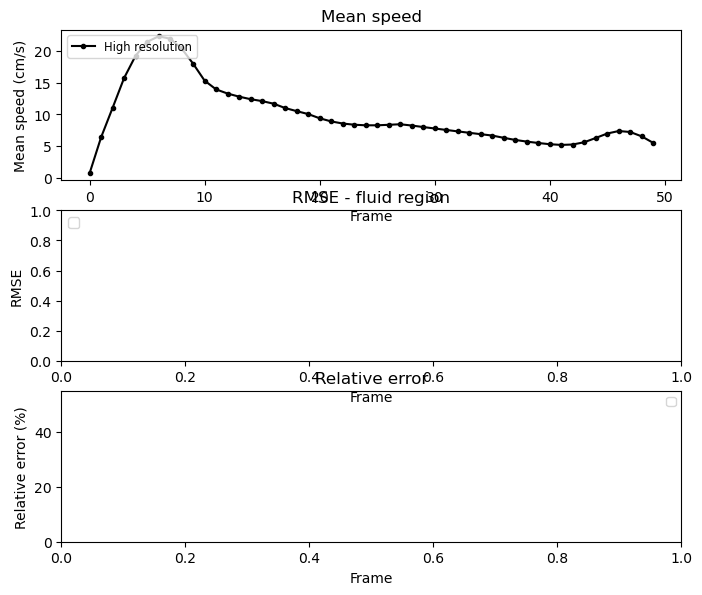

In [29]:
set_names = [set_name for _ in range(len(model_names))]
colors = [KTH_colors['blue100'], KTH_colors['lightblue100'],  KTH_colors['grey100'], KTH_colors['pink80'], KTH_colors['grey40'],]#['steelblue', 'darkorange', 'brown', 'orchid', 'darkviolet', 'olivedrab', 'lightcoral', 'maroon', 'yellow', 'seagreen']
markers = ['solid', ':',  '--','-.',  (0, (3, 1, 1, 1)),'-.', ]
fig = plt.figure(figsize=(8, 9))
# compare_peak_flow_pixel(gt,lr, model_names, set_names, tabular_names, colors,'tabel',patch_size, show_avg, show_pixel, use_dynamical_mask = use_dyn_mask)
comparison_multiple_models(model_names, set_names, tabular_names, colors,'Table',markers,  use_dyn_mask)


KeyError: 'u_fluid'

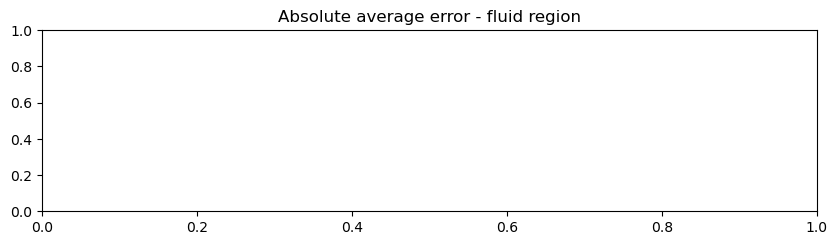

In [35]:
plot_abs_error(model_names, set_names, tabular_names, colors,'tabel', use_dyn_mask)
plt.legend()

### Comparison depth resnet

In [ ]:
model_names = ['20230620-0909', '20230710-1737', '20230710-1741', '20230710-1739']#['20230405-1417', '20230405-1419', '20230405-1421','20230407-2222']#['20230301-1641', '20230305-1001', '20230305-1002', '20230305-1008'] # resnet: Temporal4DFlowNet_20230301-1641 #
set_names = [set_name for _ in range(len(model_names))]
labels = ['ResNet 8-4' , 'ResNet 4-8', 'ResNet 10-6', 'ResNet 4-2']
# colors = ['steelblue', 'darkorange', 'brown', 'orchid', 'darkviolet']
name_comparison = 'Depth_MoreEpochs'
fig = plt.figure(figsize=(8, 9))
# comparison_multiple_models(model_names, set_names, labels, colors,'Depth',markers,  use_dyn_mask)

network_prediction = {}
for m_name, t_name in zip(model_names, labels):
    # _, _, network_prediction[t_name],_, _ = load_data(m_name, set_name, data_model, step, dynamic_mask_used = use_dyn_mask) #load data
    network_prediction[t_name] = load_velocity_data(f'{result_dir}/Temporal4DFlowNet_{m_name}/{set_name}set_result_model{data_model}_2mm_step{step}_{m_name[-4::]}_temporal.h5', network_prediction, ['u_combined', 'v_combined', 'w_combined'], load_mask = False)
idx_cube = np.index_exp[:, :, 5:50, 10:60]
frames = [32, 33, 34, 35, 36]
plot_slices_over_time1(gt['u'][idx_cube],lr['u'][idx_cube], gt['mask'][idx_cube], 0, [network_prediction[t_name]['u'][idx_cube] for t_name in labels], labels, frames, axis=0, idx=22,min_v = min_v['u'], max_v = max_v['u'],save_as = f"{eval_dir}/{set_name}_M{data_model}Frame_comparison_{name_comparison}_u_test.png", figsize=(8, 9))
plot_slices_over_time1(gt['v'][idx_cube],lr['v'][idx_cube], gt['mask'][idx_cube], 0, [network_prediction[t_name]['v'][idx_cube] for t_name in labels], labels, frames, axis=0, idx=22,min_v = min_v['v'], max_v = max_v['v'],save_as = f"{eval_dir}/{set_name}_M{data_model}Frame_comparison_{name_comparison}_v_test.png", figsize=(8, 9))
plot_slices_over_time1(gt['w'][idx_cube],lr['w'][idx_cube], gt['mask'][idx_cube], 0, [network_prediction[t_name]['w'][idx_cube] for t_name in labels], labels, frames, axis=0, idx=22,min_v = min_v['w'], max_v = max_v['w'],save_as = f"{eval_dir}/{set_name}_M{data_model}Frame_comparison_{name_comparison}_w_test.png", figsize=(8, 9))

# comparison_multiple_models(model_names, set_names, labels, colors,name_comparison, use_dyn_mask)
# compare_peak_flow_pixel(gt,lr, model_names, set_names, labels, colors,name_comparison,patch_size, show_avg, show_pixel, use_dynamical_mask = use_dyn_mask)

### Comparison sampling of data

In [ ]:
# model_names = ['20230301-1641','20230301-1127'] 
# set_names = [set_name for _ in range(len(model_names))]
# labels = [f'ResNet-Cartesian_Sampling_{set_names[0]}',f'ResNet_RadialSampling_{set_names[0]}']
# # colors = ['steelblue','darkorange', 'brown', 'orchid', 'darkviolet'] 
# name_comparison = 'RadialSampling'

# comparison_multiple_models(model_names, set_names, labels, colors, name_comparison)

# compare_peak_flow_pixel(gt,lr, model_names, set_names, labels, colors,name_comparison,patch_size, show_avg, show_pixel, use_dynamical_mask = use_dyn_mask)

### Comparison Upsampling layer

In [ ]:
model_names = ['20230620-0909','20230710-1800', '20230710-1803']#['20230405-1417', '20230405-1422',  '20230405-1423',]#['20230301-1641','20230305-1107', '20230306-1120']# resnet: Temporal4DFlowNet_20230301-1641 #
set_names = [set_name for _ in range(len(model_names))]
labels = [f'Linear', f'Nearest neigh.', f'TranspConv.']
# colors = ['steelblue','darkorange', 'brown', 'orchid', 'darkviolet'] 
name_comparison = 'upsampling_MoreEpochs'
# fig = plt.figure(figsize=(8, 9))
fig = plt.figure(figsize=(8, 9))
# comparison_multiple_models(model_names, set_names, labels, colors,'Upsampling',markers,  use_dyn_mask)


network_prediction = {}
for m_name, t_name in zip(model_names, labels):
    _, _, network_prediction[t_name],_, _ = load_data(m_name, set_name, data_model, step, dynamic_mask_used = use_dyn_mask) #load data
idx_cube = np.index_exp[:, :, 5:50, 10:70]
frames = [32, 33, 34, 35, 36]
plot_slices_over_time1(gt['u'][idx_cube],lr['u'][idx_cube], gt['mask'][idx_cube], 0, [network_prediction[t_name]['u'][idx_cube] for t_name in labels], labels, frames, axis=0, idx=22,min_v = min_v['u'], max_v = max_v['u'],save_as = f"{eval_dir}/{set_name}_M{data_model}Frame_comparison_{name_comparison}_u_test.png", figsize=( 8, 5))
plot_slices_over_time1(gt['v'][idx_cube],lr['v'][idx_cube], gt['mask'][idx_cube], 0, [network_prediction[t_name]['v'][idx_cube] for t_name in labels], labels, frames, axis=0, idx=22,min_v = min_v['v'], max_v = max_v['v'],save_as = f"{eval_dir}/{set_name}_M{data_model}Frame_comparison_{name_comparison}_v_test.png", figsize=( 8, 5))
plot_slices_over_time1(gt['w'][idx_cube],lr['w'][idx_cube], gt['mask'][idx_cube], 0, [network_prediction[t_name]['w'][idx_cube] for t_name in labels], labels, frames, axis=0, idx=22,min_v = min_v['w'], max_v = max_v['w'],save_as = f"{eval_dir}/{set_name}_M{data_model}Frame_comparison_{name_comparison}_w_test.png", figsize=( 8, 5))
# comparison_multiple_models(model_names, set_names, labels, colors,name_comparison, use_dyn_mask)
# compare_peak_flow_pixel(gt,lr, model_names, set_names, labels, colors,name_comparison,patch_size, show_avg, show_pixel, use_dynamical_mask = use_dyn_mask)

### Comparison architecture components

In [ ]:
# model_names = ['20230405-1417', '20230404-1418', '20230407-2228', '20230407-2230', '20230407-2246', '20230711-0928']#['20230301-1641','20230301-1654', '20230301-1704'] ## resnet: Temporal4DFlowNet_20230301-1641 #
model_names = ['20230620-0909','20230710-1743', '20230710-1744','20230710-1748',  '20230710-1756','20230711-0928' ]
set_names = [set_name for _ in range(len(model_names))]
labels = [f'ResNet',   'DenseNet', 'CSPNet','Res_UNet', 'Res_Res_UNet', 'ConvLSTM']
# colors = ['steelblue','darkorange', 'brown', 'orchid', 'lightblue', 'navy', 'coral']
name_comparison = 'Architecture_MoreEpochs'
# fig = plt.figure(figsize=(9, 10))
fig = plt.figure(figsize=(8, 9))
# comparison_multiple_models(model_names, set_names, labels, colors,'Architecture',markers,  use_dyn_mask)

network_prediction = {}
for m_name, t_name in zip(model_names, labels):
    _, _, network_prediction[t_name],_, _ = load_data(m_name, set_name, data_model, step, dynamic_mask_used = use_dyn_mask) #load data
idx_cube = np.index_exp[:, :, 5:50, 10:70]
frames = [32, 33, 34, 35, 36]
plot_slices_over_time1(gt['u'][idx_cube],lr['u'][idx_cube], gt['mask'][idx_cube], 0, [network_prediction[t_name]['u'][idx_cube] for t_name in labels], labels, frames, axis=0, idx=22,min_v = min_v['u'], max_v = max_v['u'],save_as = f"{eval_dir}/{set_name}_M{data_model}Frame_comparison_{name_comparison}_u_test.png", figsize=(8, 8))
plot_slices_over_time1(gt['v'][idx_cube],lr['v'][idx_cube], gt['mask'][idx_cube], 0, [network_prediction[t_name]['v'][idx_cube] for t_name in labels], labels, frames, axis=0, idx=22,min_v = min_v['v'], max_v = max_v['v'],save_as = f"{eval_dir}/{set_name}_M{data_model}Frame_comparison_{name_comparison}_v_test.png", figsize=(8, 8))
plot_slices_over_time1(gt['w'][idx_cube],lr['w'][idx_cube], gt['mask'][idx_cube], 0, [network_prediction[t_name]['w'][idx_cube] for t_name in labels], labels, frames, axis=0, idx=22,min_v = min_v['w'], max_v = max_v['w'],save_as = f"{eval_dir}/{set_name}_M{data_model}Frame_comparison_{name_comparison}_w_test.png", figsize=(8, 8))

# compare_peak_flow_pixel(gt,lr, model_names, set_names, labels, colors,name_comparison,patch_size, show_avg, show_pixel, use_dynamical_mask = use_dyn_mask)


## Cross-validation

In [ ]:
model_names = ['20230405-1417', '20230427-1204', '20230427-1207']## resnet: Temporal4DFlowNet_20230301-1641 #
set_names = [set_name for _ in range(len(model_names))]
labels = ['TrainM2M3-ValM1', 'TrainM1M3-ValM2', 'TrainM1M2-ValM3' ] 
# colors = ['steelblue','darkorange', 'brown', 'orchid', 'darkviolet']
name_comparison = 'Static_dynamic_mask'
# comparison_multiple_models(model_names, set_names, labels, colors,name_comparison)
comparison_multiple_models(model_names, set_names, labels, colors,'CrossValidation',markers,  use_dyn_mask)


diff_RE = []
diff_mean_speed = []
diff_RMSE = []
for m_name, s_name, label, color, marker in zip(model_names, set_names, labels, colors, markers):
    lr_1, gt_1, prediction_1,temporal_mask_1, _ = load_data(m_name, s_name, data_model, step, dynamic_mask_used = use_dyn_mask)
    rel_err = calculate_relative_error_normalized(prediction_1["u"], prediction_1["v"], prediction_1["w"], gt_1["u"], gt_1["v"] , gt_1["w"], gt_1["mask"])
    mean_speed = calculate_mean_speed(prediction_1["u_fluid"], prediction_1["v_fluid"], prediction_1["w_fluid"],gt_1["mask"])
    
    diff_RE.append(rel_err)
    diff_mean_speed.append(mean_speed)
    diff_RMSE.append(calculate_rmse(prediction_1['speed'], gt_1['speed'], gt_1['mask']))

print(diff_RE[0] - diff_RE[1])
print('RE max', np.max(np.abs(diff_RE[0] - diff_RE[1])))
print('RE mean', np.mean(np.abs(diff_RE[0] - diff_RE[1])))
print('speed max', np.max(diff_mean_speed[0] - diff_mean_speed[1]))
print('speed mean', np.mean(diff_mean_speed[0] - diff_mean_speed[1]))
print(np.max(np.abs(diff_RMSE[0] - diff_RMSE[1])))
print(np.mean(np.abs(diff_RMSE[0] - diff_RMSE[1])))


